# Neural Networks Course - LEONARDO H. DE MORAES - Final Project  

**Name:** Leonardo H. de Moraes  
**Student ID:** 1711609  

**Course:** Neural Networks - Polytechnic Institute of Guarda (IPG)  
**Acronym:** LEI  
**Department:** School of Technology and Management  
**Degree:** Bachelor's  
**Program:** Computer Engineering  
**Academic Year:** 2024/2025  
**Professor:** Noel de Jesus Mendonça Lopes  

---

## Project Objective  
The goal of this project is to develop predictive models for the exchange rates of the US Dollar (**USD**) and the Japanese Yen (**JPY**) against the Euro (**EUR**). Students will use neural networks to build and compare different models.  

In [1]:
## Import Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from dataset_utils.ltms_model import ForexPredictorLSTM


2025-05-26 23:24:15.356121: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 23:24:15.361224: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-26 23:24:15.373663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748298255.396040   27497 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748298255.402313   27497 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748298255.418266   27497 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
print('+ == =================================================================== == +')
print('|                          Load and preprocess data                         |')
print('+ == =================================================================== == +')


dataset_path = "../data/dateset/multi_forex_dataset_2015-01-01_to_2025-05-24.csv"
predictor = ForexPredictorLSTM(dataset_path, look_back=30)


+ == =================================================================== == +
|                          Load and preprocess data                         |
+ == =================================================================== == +


In [3]:

# 2. Carregar e pré-processar os dados
X_train, y_train, X_test, y_test, df = predictor.load_and_preprocess_data()


In [4]:

# 3. Construir o modelo - ESTA É A ETAPA QUE ESTAVA FALTANDO
input_shape = (X_train.shape[1], X_train.shape[2])  # (time_steps, features)
predictor.model = predictor.build_model(input_shape)  # Atribui o modelo construído à instância


E0000 00:00:1748298266.732977   27497 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1748298266.734141   27497 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/leo-moraes/Documents/leo/IPG/Redes_Neurais/final_work_redes_neurais/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:

## == Train_model
print("Iniciando treinamento do modelo LSTM...")
history = predictor.train_model(X_train, y_train, X_test, y_test)



Iniciando treinamento do modelo LSTM...
Epoch 1/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 14s 57ms/step - loss: 0.0463 - mae: 0.1380 - val_loss: 0.0215 - val_mae: 0.1068
Epoch 2/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 0.0013 - mae: 0.0277 - val_loss: 0.0138 - val_mae: 0.0862
Epoch 3/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.0011 - mae: 0.0251 - val_loss: 0.0113 - val_mae: 0.0861
Epoch 4/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 9.4363e-04 - mae: 0.0238 - val_loss: 0.0136 - val_mae: 0.0961
Epoch 5/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 55ms/step - loss: 8.8169e-04 - mae: 0.0228 - val_loss: 0.0133 - val_mae: 0.0944
Epoch 6/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 8.3208e-04 - mae: 0.0222 - val_loss: 0.0123 - val_mae: 0.0914
Epoch 7/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 12s 66ms/step - loss: 7.8232e-04 - mae: 0.0215 - val_loss: 0.0135 - val_mae: 0.0941
Epoch 8/100
179/179 ━━━━━━━━━━━━━━━━━━━━ 17s 94ms/step - loss: 7.3872e-04 - mae: 0.0207 - val_loss: 

In [6]:

print("\nAvaliando o modelo...")
rmse_usd, rmse_jpy = predictor.make_predictions(X_test, y_test, df)
print(f"\nRMSE USD/EUR: {rmse_usd:.6f}")
print(f"RMSE JPY/EUR: {rmse_jpy:.6f}")


Avaliando o modelo...
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

RMSE USD/EUR: 0.018151
RMSE JPY/EUR: 0.000162


223/223 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step

Previsões para os próximos 5 dias:
      Data  USD/EUR_Previsto  JPY/EUR_Previsto
2025-05-24          0.848626          0.006196
2025-05-25          0.832344          0.006108
2025-05-26          0.817620          0.006065
2025-05-27          0.806604          0.006027
2025-05-28          0.797211          0.006012




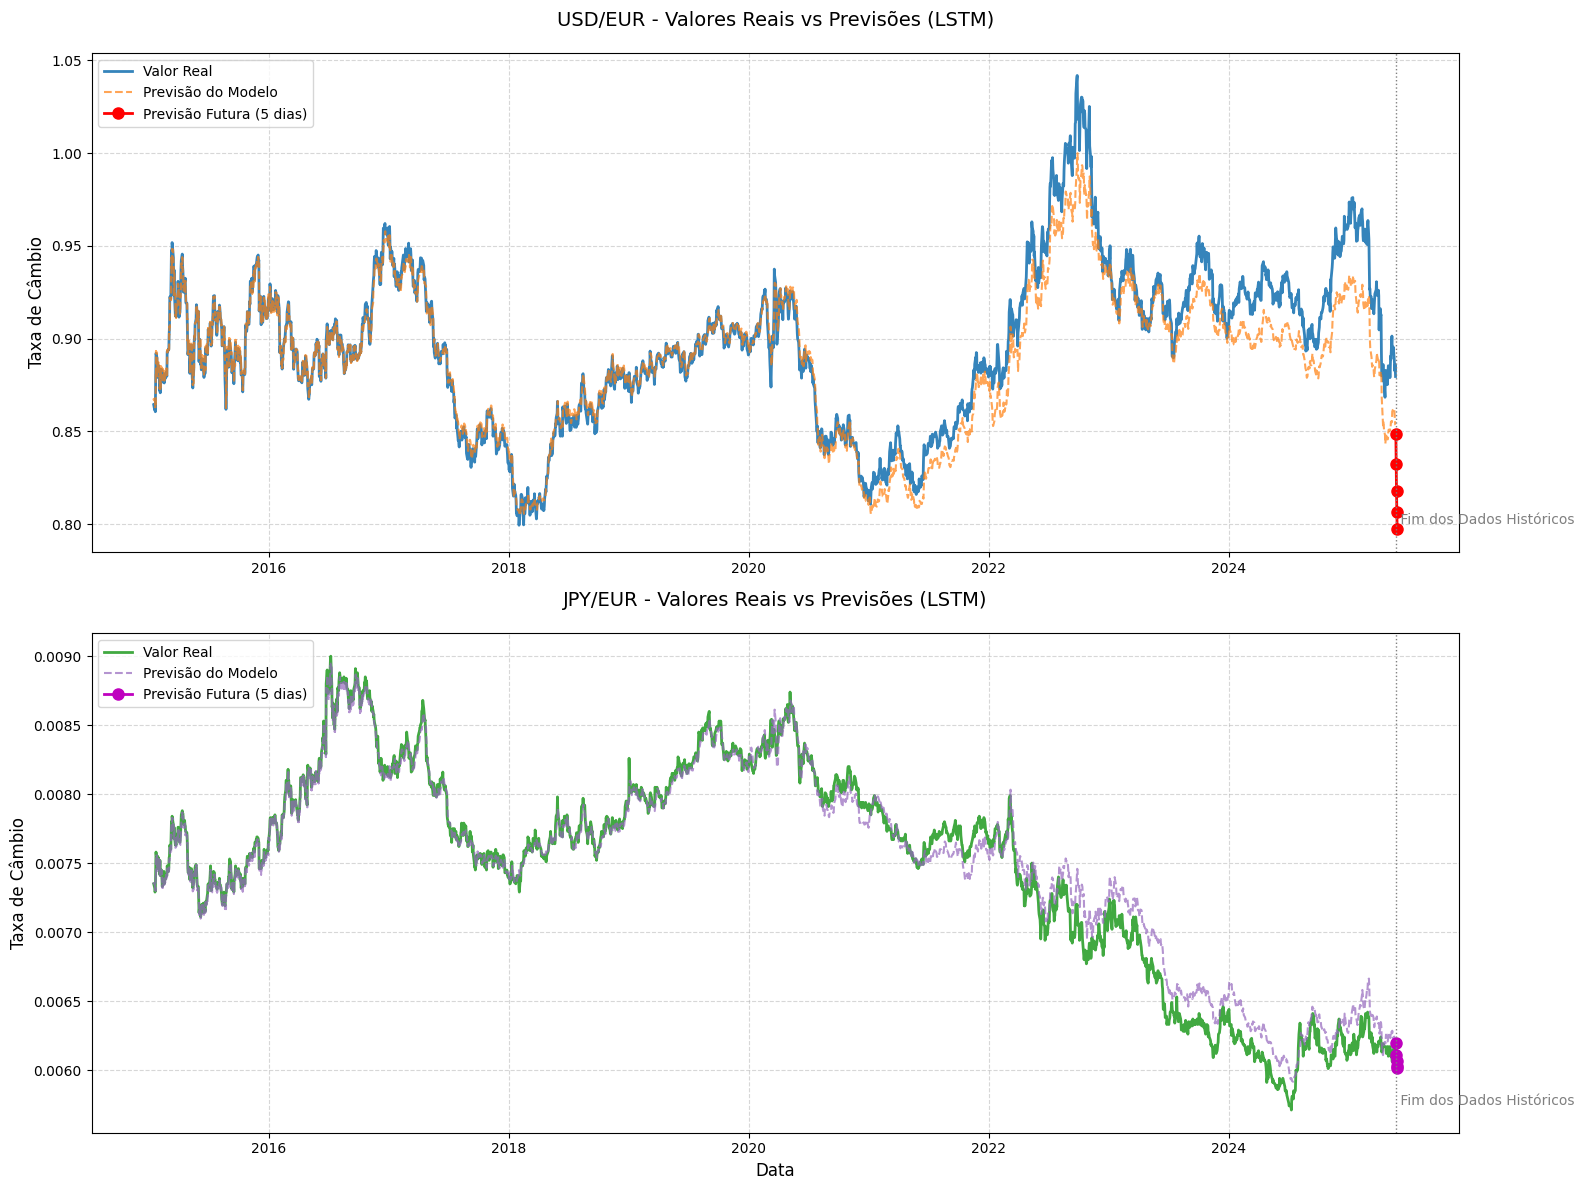

In [7]:
## == 5 Days
future_predictions = predictor.plot_results(df)

In [8]:
## == Save prediction
future_predictions.to_csv("../temp/forex_predictions_enhanced_LSTM.csv", index=False)